Survived - 생존유무, target 값. (0 = 사망, 1 = 생존)

Name - 탑승객 성명

Pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)

Sex - 성별

Age - 나이(세)

SibSp - 함께 탑승한 형제자매, 배우자 수 총합

Parch - 함께 탑승한 부모, 자녀 수 총합

Embarked - 탑승 항구 -> C = Cherbourg, Q = Queenstown, S = Southampton

Fare - 탑승 요금

Ticket - 티켓 넘버

Cabin - 객실 넘버

In [381]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings(action='ignore') 




In [444]:
# 데이터 불러오기
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
submission = pd.read_csv("./gender_submission.csv")
# 혹시 몰라 합친 데이터
combine=[train,test]

In [383]:
# 데이터 형태 확인
print(train.shape)  #(891, 12)
print(test.shape)  #(418, 11)

submission.head()

(891, 12)
(418, 11)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [435]:
#  결측치 확인
# train.isnull().sum()
# test.isnull().sum()

print(test.shape)
print(train.shape)

print(train.isna().sum())
print("fffff")
print(test.isna().sum())
# msno.matrix(train,figsize=(12,5)) 
 # 흰색 부분이 결측치 (age:177, cabin:687, embarked:2 개의 결측치 존재)






(418, 11)
(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
fffff
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


train: (891, 12)
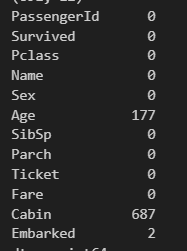


test : (418, 11)
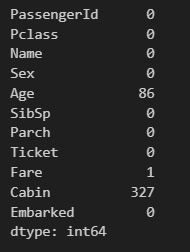

# cabin의 결측치는 너무 많아서 채워서 사용하면 왜곡이 넣무 많아짐

# EDA

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


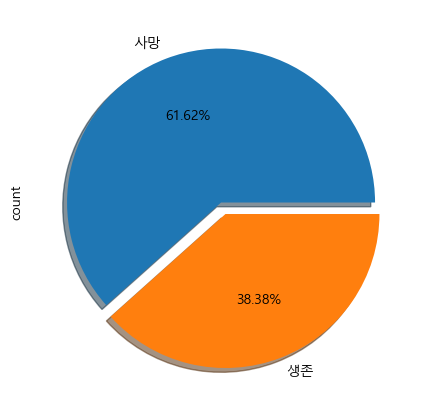

In [445]:
# 생존비율 확인
train["Survived"].value_counts()

# Survived
# 0    549
# 1    342

plt.figure(figsize=(15, 5))
labels = ['사망', '생존']
train['Survived'].value_counts().plot.pie(explode=[0, 0.08], 
                                          shadow=True,
                                          autopct='%1.2f%%',
                                          labels=labels)
train

In [450]:
def bar_chart(fe):
    survived = train[train['Survived'] == 1][fe].value_counts()
    dead = train[train['Survived'] == 0][fe].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))
      ax = df.plot(kind='bar', stacked=True, figsize=(10, 5), title="성별 사망자수")


AttributeError: 'PlotAccessor' object has no attribute 'title'

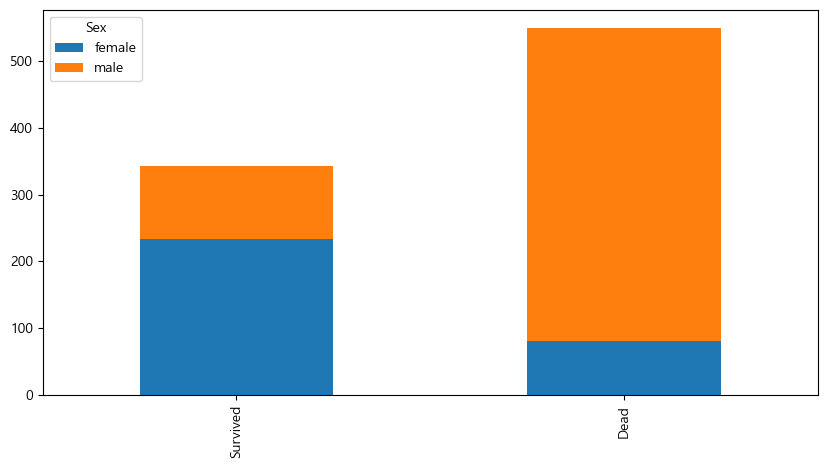

In [451]:
bar_chart('Sex')


Sex
male      577
female    314
Name: count, dtype: int64
여성 생존자 수: 233
남성 생존자 수: 109


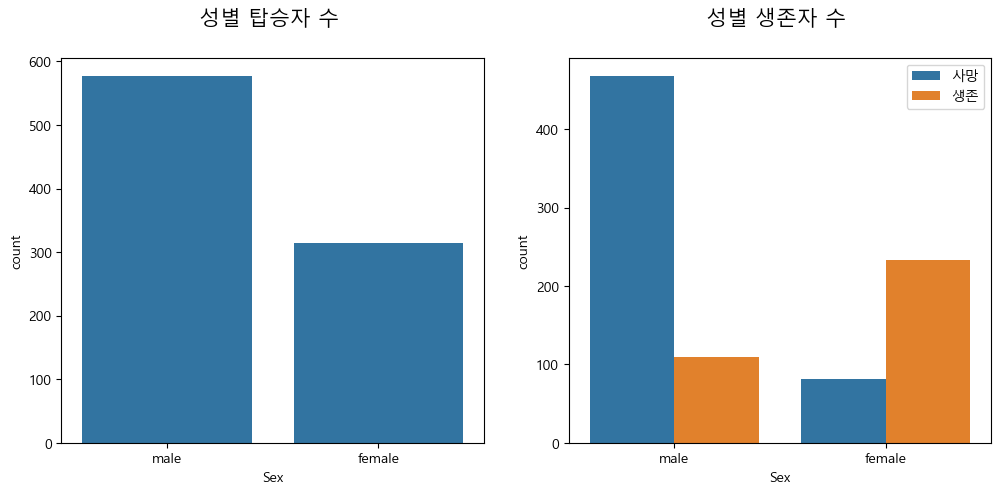

In [386]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # 1행 2열의 그래프 구조 axes 생성

# 첫번째 axes
axes[0].set_title("성별 탑승자 수 \n", size=15) 
# train 데이터셋에서 SEX열기준으로 데이터 개수를 세어 바 차트로 나타냄
sns.countplot(x="Sex", data=train, ax=axes[0])

axes[1].set_title("성별 생존자 수 \n", size=15)
# SEX 기준으로 바 차트를 그리되 hue="Survived" 파라미터를 통해 생존 여부(hue는 색상을 다르게 그룹화 해주는 함수)
sns.countplot(x="Sex", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['사망', '생존'])


print(train['Sex'].value_counts()) # male: 577명  female: 314명


# ------------------------
# 'Sex'가 male | female'이고 'Survived'가 1인 행의 수 세기
female_survivors_count = train[(train['Sex'] == 'female') & (train['Survived'] == 1)].shape[0]
print("여성 생존자 수:", female_survivors_count)
male_survivors_count = train[(train['Sex'] == 'male') & (train['Survived'] == 1)].shape[0]
print("남성 생존자 수:", male_survivors_count)


Axes(0.125,0.11;0.775x0.77)


,Survived
Sex,
female,0.742038
male,0.188908


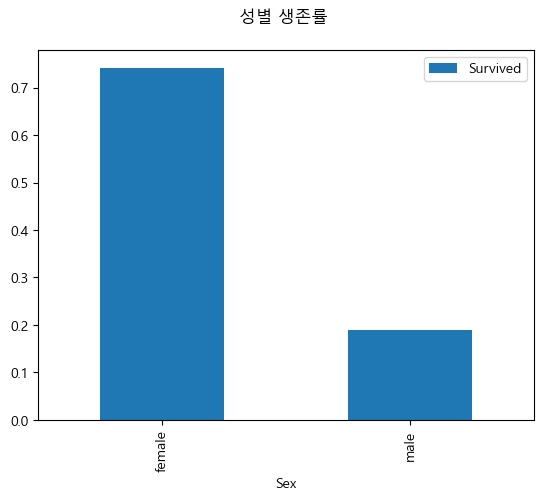

In [387]:
# # 성별 생존률
#         Sex  Survived
# 0      male         0
# 1    female         1
# 2    female         1
# 3      male         1


sur = train[['Sex', 'Survived']].groupby('Sex').mean().plot.bar()
print(sur)

sur.set_title("성별 생존률 \n")
train[['Sex', 'Survived']].groupby('Sex').mean()

Text(0.5, 1.0, 'class별 생존률')

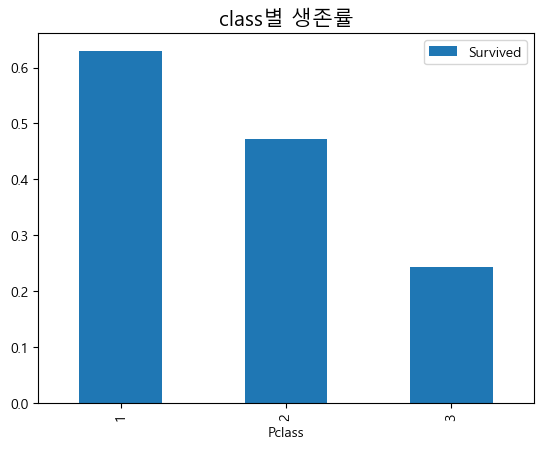

In [388]:
# 티켓 클래스별 생존률
train[['Pclass','Survived']].groupby('Pclass').mean()
# class별 생존률
sur = train[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()
sur.set_title('class별 생존률', size=15)

<Figure size 800x500 with 0 Axes>

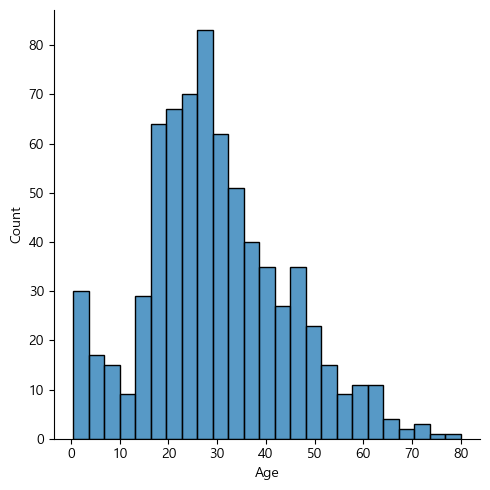

In [389]:
# 나이
train['Age'].describe()

plt.figure(figsize=(8,5))

# 나이 분포 그래프
sns.displot(train['Age'],bins=25)


Text(0.5, 1.0, '나이별 생존, 사망자 비율')

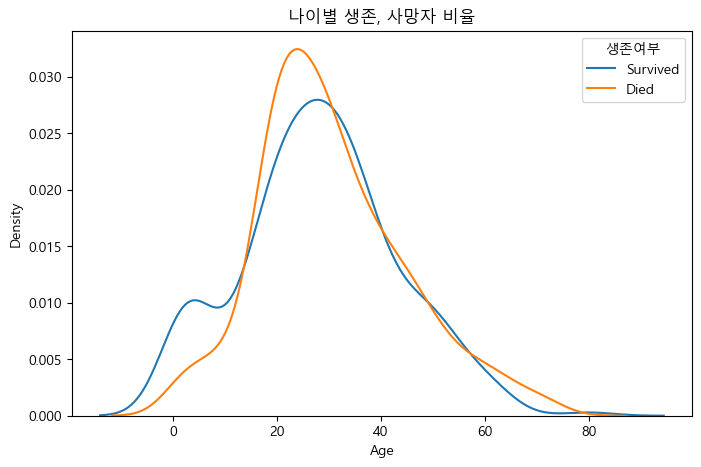

In [390]:
# sur과 dead는 각각의 조건만 선택된 DataFrame형
sur = train[train['Survived'] == 1]  # [[행],[렬]] 구조이므로 Survived가 1인 행만 선택
dead = train[train['Survived'] == 0] # [[행],[렬]] 구조이므로 Survived가 0인 행만 선택

plt.figure(figsize=(8, 5))
sns.distplot(sur['Age'], bins=25, hist=False, label='Survived')
sns.distplot(dead['Age'], bins=25, hist=False, label='Died')
plt.legend(title="생존여부")
plt.title("나이별 생존, 사망자 비율")

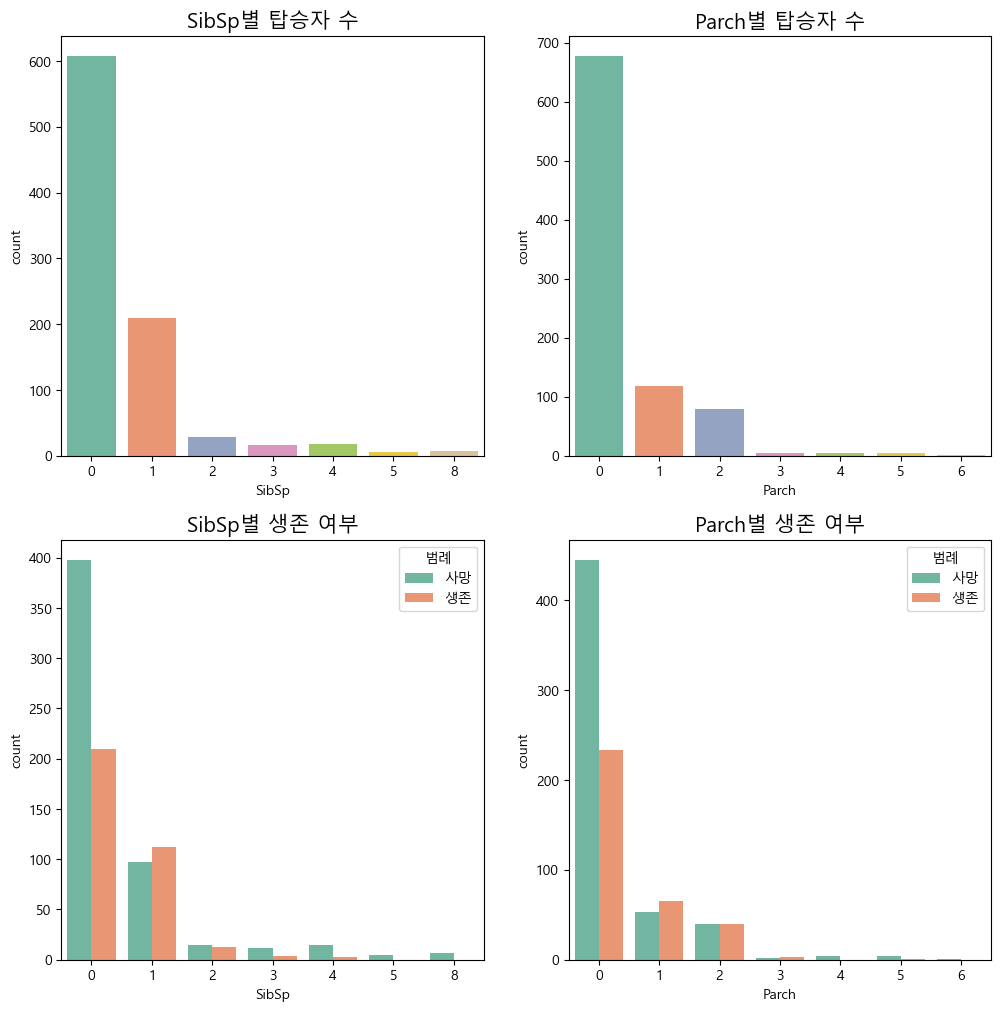

In [391]:
# 함께 탑승한 가족의 수 (SibSp, Parch)
# SibSp: 함께 탑승한 형제자매, 배우자 수 총합
# Parch: 함께 탑승한 부모, 자녀 수 총합
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

#  대부분에 승객이 형제자매나 배우자 없이 혼자 탑승함
axes[0][0].set_title("SibSp별 탑승자 수", size=15)
sns.countplot(x="SibSp", data=train, ax=axes[0][0], palette="Set2")

# 대부분의 승객은 부모나 자녀 없이 혼자 탑승함
axes[0][1].set_title("Parch별 탑승자 수", size=15)
sns.countplot(x="Parch", data=train, ax=axes[0][1], palette="Set2")

# 형제자매나 배우자 - 혼자 탑승하는거보다 둘이 탑승했을때 더 잘살아남음
axes[1][0].set_title("SibSp별 생존 여부", size=15)
sns.countplot(x="SibSp", hue="Survived", data=train, ax=axes[1][0], palette="Set2")
# 범례 레이블 지정
handles, _ = axes[1][0].get_legend_handles_labels()
axes[1][0].legend(handles, ['사망', '생존'], title='범례', loc='upper right')

# 부모나 자녀-  혼자 탑승하는거보다 둘이 탑승했을때 더 잘살아남음
axes[1][1].set_title("Parch별 생존 여부", size=15)
sns.countplot(x="Parch", hue="Survived", data=train, ax=axes[1][1], palette="Set2")
# 범례 레이블 지정
handles, _ = axes[1][1].get_legend_handles_labels()
axes[1][1].legend(handles, ['사망', '생존'], title='범례', loc='upper right')


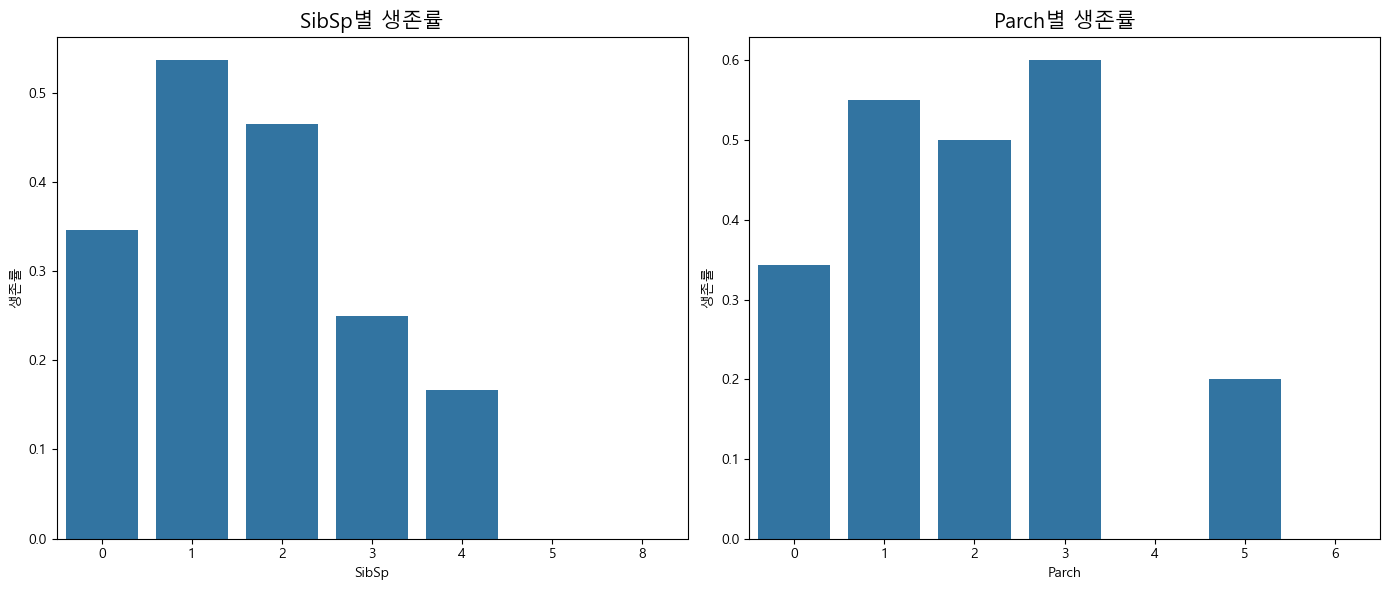

In [392]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터셋 설정
# train = pandas.read_csv('path_to_your_dataset.csv')

# SibSp와 Parch에 따른 생존률 계산
sibsp_survival_rate = train[['SibSp', 'Survived']].groupby(['SibSp']).mean()
parch_survival_rate = train[['Parch', 'Survived']].groupby(['Parch']).mean()

# 생존률 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# SibSp별 생존률
sns.barplot(x=sibsp_survival_rate.index, y=sibsp_survival_rate['Survived'], ax=axes[0])
axes[0].set_title('SibSp별 생존률', fontsize=15)
axes[0].set_ylabel('생존률')
axes[0].set_xlabel('SibSp')

# Parch별 생존률
sns.barplot(x=parch_survival_rate.index, y=parch_survival_rate['Survived'], ax=axes[1])
axes[1].set_title('Parch별 생존률', fontsize=15)
axes[1].set_ylabel('생존률')
axes[1].set_xlabel('Parch')

plt.tight_layout()
plt.show()

 # 결론
# 대부분 혼자 탑승한 경우가 많음
# 혼자 탑승한거보다 둘이 탄 경우가 생존률이 높음
 
 # 분석
# 혼자 탑승한 승객들은 많았지만, 생존률은 상대적으로 낮았습니다. 이는 초기 구조 작업에서 가족 단위로 함께 움직인 그룹이 더 효과적으로 구조될 가능성이 있음을 시사합니다.
# 가족 구성원의 수가 적당히 많은 경우 (1-3명), 서로를 도와 생존할 확률이 높아지는 것으로 보입니다. 그러나 이 수가 너무 많으면 오히려 생존률이 떨어질 수 있음을 보여줍니다. 이는 대규모 가족의 경우 모두를 구하는 것이 더 어려웠을 수 있기 때문일 수 있습니다.

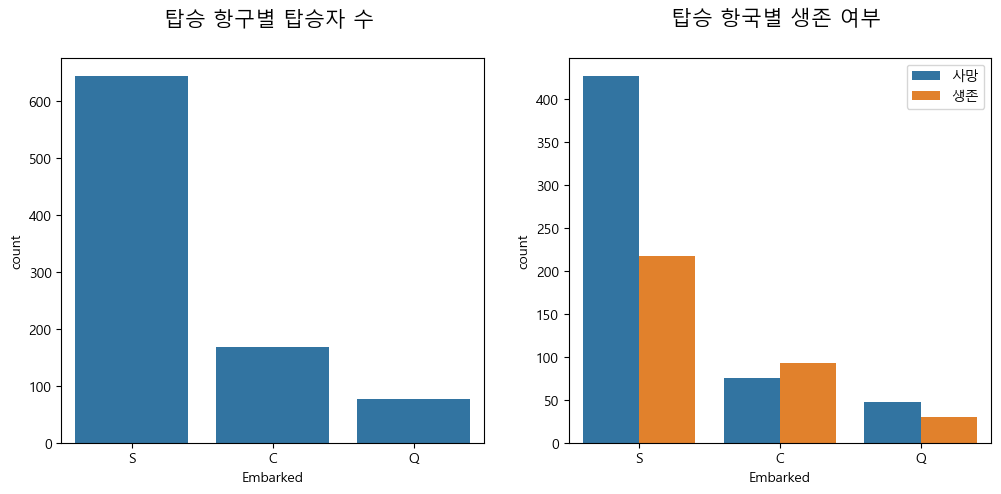

In [393]:
# 탑승항구 (Embarked)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("탑승 항구별 탑승자 수 \n", size=15)
sns.countplot(x="Embarked", data=train, ax=axes[0])

axes[1].set_title("탑승 항국별 생존 여부 \n", size=15)
sns.countplot(x="Embarked", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['사망', '생존'])



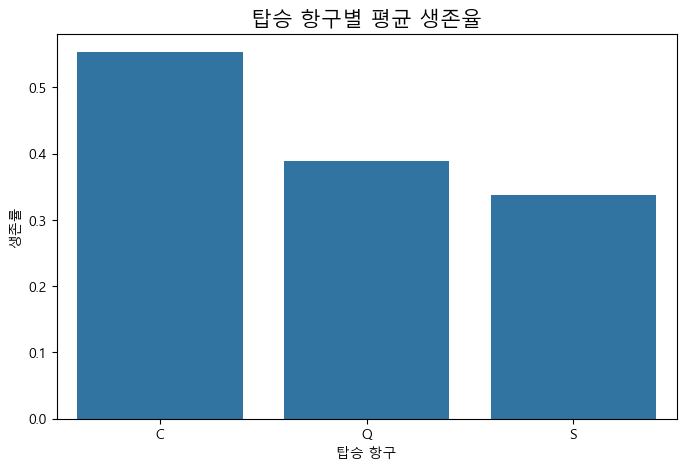

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터셋 설정
# train = pandas.read_csv('path_to_your_dataset.csv')

# Embarked별 생존률 계산
embarked_survival_rate = train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

# 생존률 그래프 그리기
plt.figure(figsize=(8, 5))
sns.barplot(x=embarked_survival_rate.index, y=embarked_survival_rate['Survived'])
plt.title('탑승 항구별 평균 생존율', fontsize=15)
plt.ylabel('생존률')
plt.xlabel('탑승 항구')
plt.show()

# 결론 : s의 사망률이 가장 높다

Text(0.5, 1.0, '항구별 티켓등급 - 인구 수')

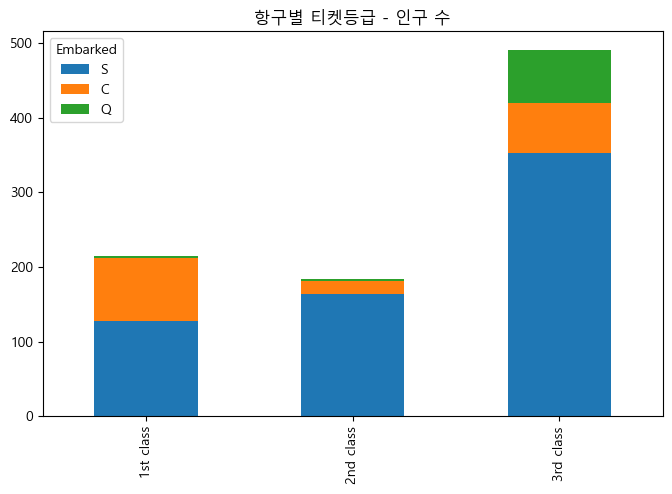

In [395]:
pc1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
pc2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
pc3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
pc = pd.DataFrame([pc1, pc2, pc3])
pc.index = ['1st class', '2nd class', '3rd class']

fig, ax = plt.subplots(figsize=(8, 5))
pc.plot(kind='bar', stacked=True, ax=ax)
plt.title("항구별 티켓등급 - 인구 수")






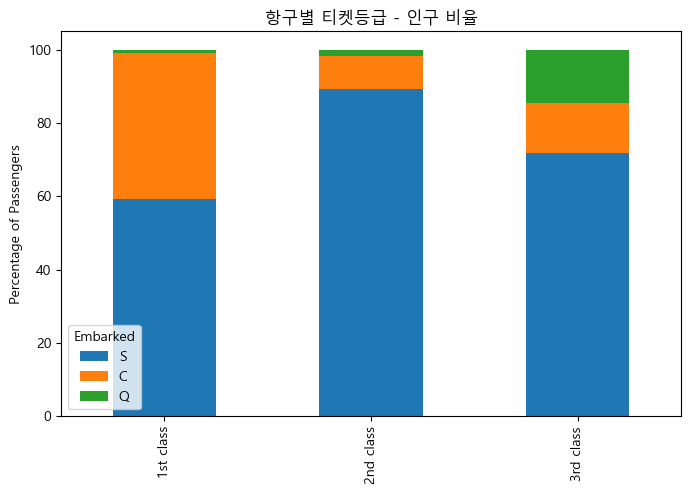

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [396]:
# 위와 같은 거지만 인구수가 아니고 비율로 만든 그래프임
# train = pandas.read_csv('path_to_your_dataset.csv')

# 각 클래스별로 Embarked 값 카운트
pc1 = train[train['Pclass'] == 1]['Embarked'].value_counts(normalize=True)
pc2 = train[train['Pclass'] == 2]['Embarked'].value_counts(normalize=True)
pc3 = train[train['Pclass'] == 3]['Embarked'].value_counts(normalize=True)

# 각 항구에서의 비율을 계산하여 데이터 프레임 생성
pc = pd.DataFrame([pc1, pc2, pc3])
pc.index = ['1st class', '2nd class', '3rd class']

# 각 값에 100을 곱하여 퍼센트로 변환
pc *= 100

# 막대 그래프 생성
fig, ax = plt.subplots(figsize=(8, 5))
pc.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Percentage of Passengers')
plt.title("항구별 티켓등급 - 인구 비율")

plt.show()

train

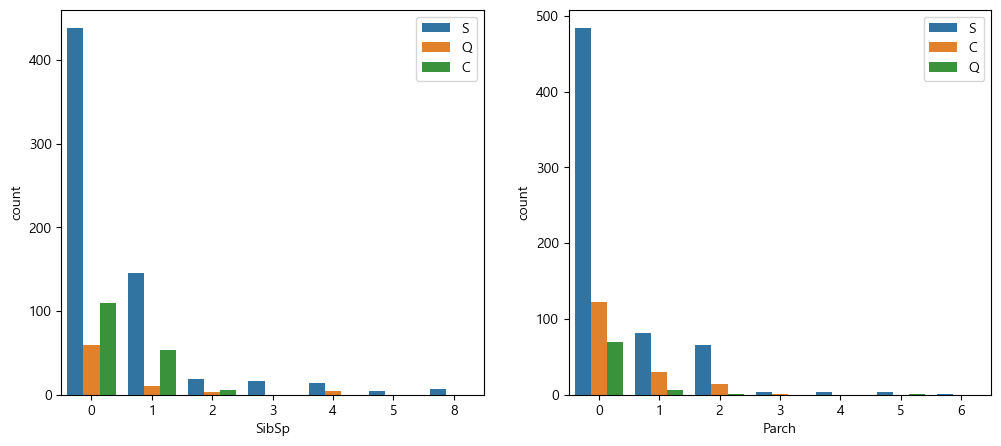

In [397]:
# 항구별 탑승객들의 동승자

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=train, x='SibSp', hue='Embarked', ax=ax[0])
sns.countplot(data=train, x='Parch', hue='Embarked', ax=ax[1])
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
plt.show()

# 해석: 혼자 탑승한 탑승객의 수는 s항구 탑승객이 압도적으로 많음

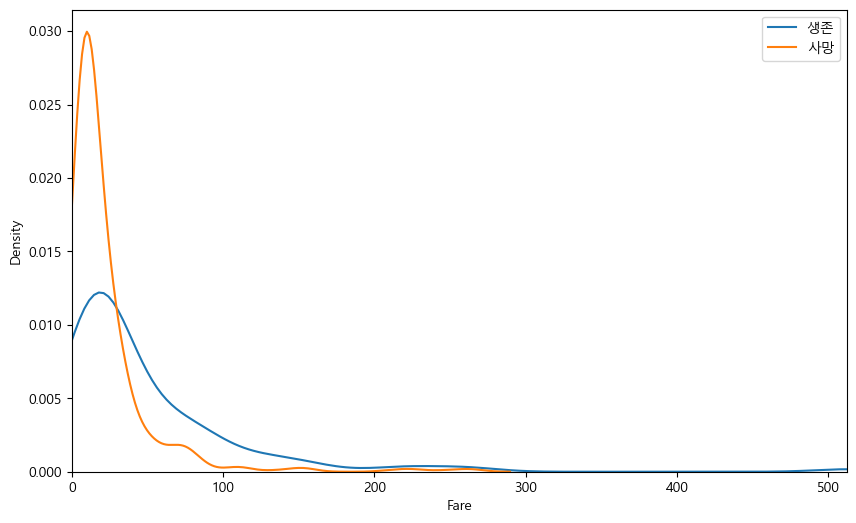

In [398]:
fig, ax = plt.subplots(figsize=(10,6))
 
# 분포 확인
sns.kdeplot(train[train['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train[train['Survived']==0]['Fare'], ax=ax)
 
# 축 범위
ax.set(xlim=(0, train['Fare'].max()))
ax.legend(['생존', '사망'])
 
plt.show()

# 해석
# 탑승 금액이 적은 쪽은 사망률이 높은 것이 확인된다
# 위에서 보았듯이 탑승 클래스/탑승 금액에 따라 생존 여부에 영향을 끼치는 것으로 생각된다.
# 

In [399]:
# cabin은 결측치가 많고 passengerid,name,ticket은 생존 여부와 연관이 없어 보임

#  #2 titanic 생존자 예측
## feature engineering & 모델링

> ###  <span style="color:red"> feature engineering: <br> 머신러닝 모델의 성능을 향상시키기 위해 데이터의 특성(피처)를 선택하고 , 변환하고 , 생성하는 과정</span>
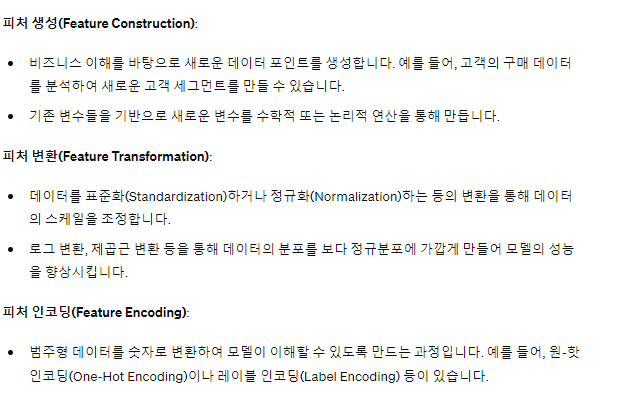

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


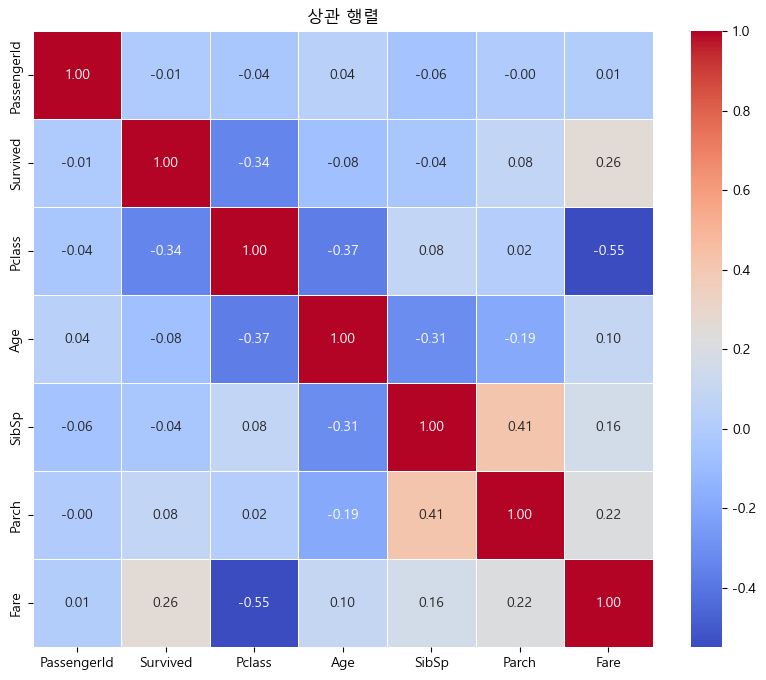

In [400]:

#  1. 상관계수 확인
      ##  숫자로만 된 값이 있어야 함
      ## 범주형(catergory형) or 문자형제외

# 숫자형 데이터만 선택
numeric_data = train.select_dtypes(include=[np.number])

# 상관계수 계산
correlation_matrix = numeric_data.corr()

print(correlation_matrix)

# 상관계수 히트맵 생성
plt.figure(figsize=(10, 8))  # 히트맵 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('상관 행렬')  # 히트맵 제목 설정
plt.show()



In [401]:
# 결측치
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 데이터 전처리

In [402]:
# train 과 test 데이터를 한번에 변환하기 위해 List 에 담음
data_list = [train, test]
print(train['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object


# 성별(sex)의 카테고리 > 수치화

In [403]:
# int type의 숫자 0과 1로 매핑
for data in data_list:
    # sex(object)-> category화 후 각 범주에 고유한 정수코드 할당
    data['Sex'] = data['Sex'].astype('category').cat.codes


train.dtypes
train['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int8

# 나이(5분위로 나눈후) > 수치형 0,1,2,3,4

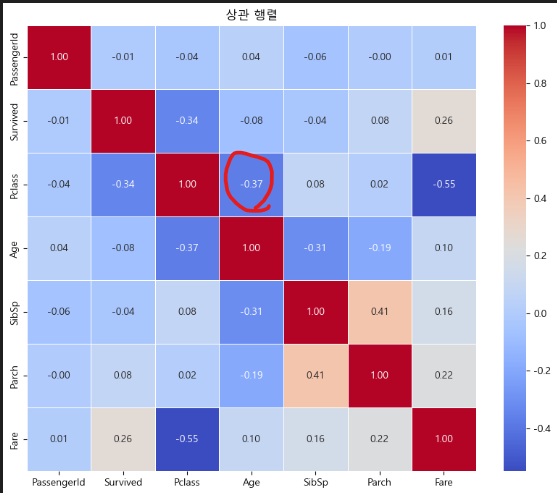 <BR>
AGE가 높을수록 등급이 높음(숫자가 작음)->  1이 제일 등급이 높으니까

In [404]:
import pandas as pd
import numpy as np
# age의 결측치가 177개 이므로 
#   데이터의 왜곡이나 이상치가 많은 경우 중앙값을 사용하는것이 가장 안전-> 이러한 요소에 영향을 덜받음


# 성별에 따른 나이의 중앙값 계산
sex_median_age = train.groupby('Sex')['Age'].median()

# 성별 중앙값을 사용하여 Age의 결측치 채우기
train['Age'] = train.apply(lambda row: row['Age'] if pd.notnull(row['Age']) else sex_median_age[row['Sex']], axis=1)


# age 결측치 있나 확인
train['Age'].isna().sum()


# age 카테고리화 - AgeRange 이용
train['AgeRange'] = pd.cut(train['Age'], 5) # 동일한 분위 5개로 나눔

# 나이대별 생존률 확인
train[['AgeRange', 'Survived']].groupby(['AgeRange']).mean()


# 16, 32, 48, 64 값들을 기준으로 카테고리화


,Survived
AgeRange,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.344168
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


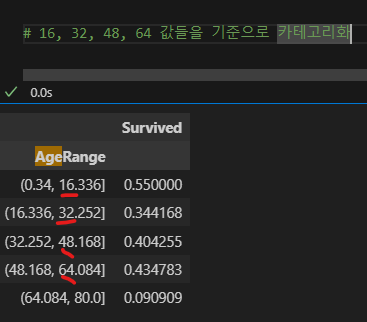

In [405]:
# # 나이 데이터도 5개 분류로 나눈 범위에서 0,1,2,3으로 카테고리화한다
for data in data_list:    
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age'] = 4
    
    
# 카테고리화가 잘 되었으니 위에서 만든 AgeRange  컬럼 제거
train.drop('AgeRange', inplace=True, axis=1)

# train.head()


# age 결측치 있나 확인
train['Age'].isna().sum()

0

## name  : 이름에 잡다한 수식어 제거 => 간소화
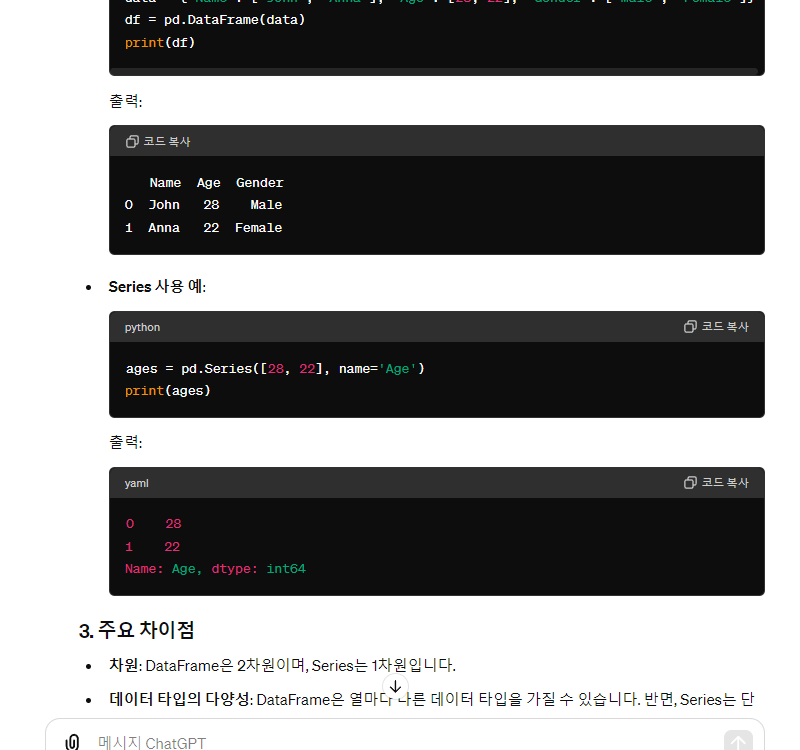
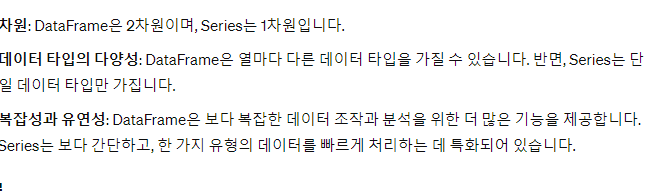


# 이름은 생존율과 상관 없음
# 하지만 mr, ms 같은 호칭은 관련이 있을지도 몰라서 추출

In [406]:
# .으로 연결된 경우 mr. 같이 호칭인 경우가 많으므로 이런 패턴을 찾는다
#   => DataFrame 과 Series 차이: 
#   > DataFrame: 2차원의 레이블이 붙은 데이터 구조체
#   > Series: 1차원의 레이블이 붙은 배열입니다. 
#             DataFrame에서 단일 열 또는 행을 선택하면 Series 객체가 반환됩니다.

# expand= false는 DataFrame이 아닌 Series로 반환
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 다양한 호칭에 대한 빈도 출력
train['Title'].value_counts() 
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,1.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",0,1.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,1.0,0,0,111369,30.0000,C148,C,Mr


In [407]:

# 호칭 (NameTitle) 에서 Mr, Miss, Mrs,Master를 제외하고는 소량의 수치이므로 other로 분류

for data in data_list:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess',
                                        'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'], 'Other')
    # 범주형 -> 수치형
    data['Title_name'] = data['Title'].astype('category').cat.codes
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_name
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,71.2833,C85,C,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,53.1000,C123,S,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,8.0500,NaN,S,Mr,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,1.0,0,0,211536,13.0000,NaN,S,Other,4
887,888,1,1,"Graham, Miss. Margaret Edith",0,1.0,0,0,112053,30.0000,B42,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1
889,890,1,1,"Behr, Mr. Karl Howell",1,1.0,0,0,111369,30.0000,C148,C,Mr,2


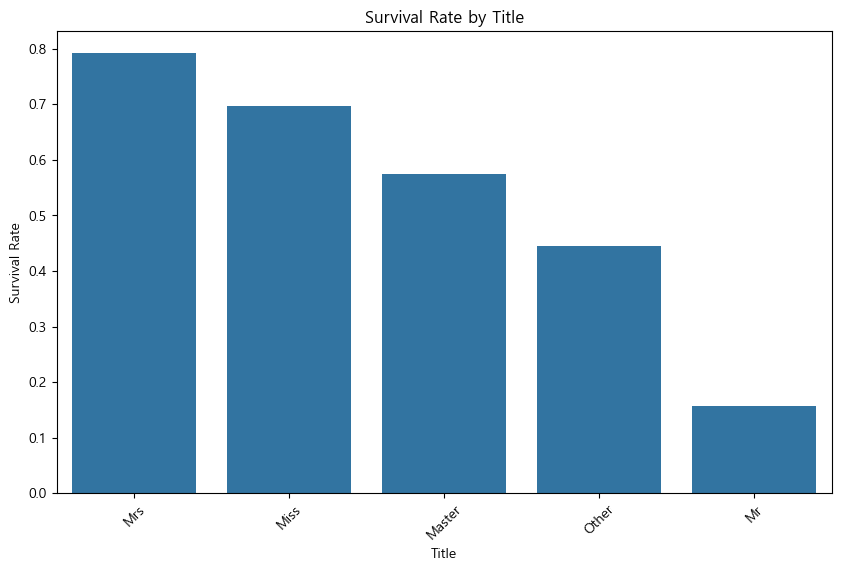

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_name
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,71.2833,C85,C,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,53.1000,C123,S,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,8.0500,NaN,S,Mr,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,1.0,0,0,211536,13.0000,NaN,S,Other,4
887,888,1,1,"Graham, Miss. Margaret Edith",0,1.0,0,0,112053,30.0000,B42,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1
889,890,1,1,"Behr, Mr. Karl Howell",1,1.0,0,0,111369,30.0000,C148,C,Mr,2


In [408]:

# 호칭 별 생존율 계산
title_survival_rate = train[['Title', 'Survived']].groupby(['Title']).mean()

# 결과를 시각화
title_survival_rate = title_survival_rate.sort_values(by='Survived', ascending=False)  # 생존율에 따라 정렬
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정
sns.barplot(x=title_survival_rate.index, y=title_survival_rate['Survived'])
plt.title('Survival Rate by Title')  # 그래프 제목
plt.xlabel('Title')  # x축 레이블
plt.ylabel('Survival Rate')  # y축 레이블
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()
train


In [409]:
# 불필요한 데이터 지우기 - 호칭 컬럼인 Title_name을 만들었으니 필요없는  name과 title 제거 

#  Q> 이름하고 생존율하고 상관 없다며?
# SEX 가 나와있는데 굳이 호칭을 구하는이유는?
train.drop(['Name', 'Title'], axis=1, inplace = True)
test.drop(['Name', 'Title'], axis=1, inplace = True)
train.head()

# Title_name: 카테고리화 된 호칭(ex 1: mr)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,0,2.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,2


# SibSp + Parch
> #### SibSp는 함께 탑승한 형제자매, 배우자의 총합 <br>/ Parch는 함께 탑승한 부모, 자녀의 총합 이었다.

In [410]:
# 혼자 탑승한 탑승객과 그외의 탑승객의 사망률 차이가 있었으므로 가족이라는 새로운 칼럼 제작

# 자신을 제외한 숫자여서 가족 구성원에 본인을 넣기 때문에 +1을 함
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train.head(700)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name,FamilySize
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,2,2
1,2,1,1,0,2.0,1,0,PC 17599,71.2833,C85,C,3,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,3,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,0,2,1,3.0,0,0,248731,13.5000,NaN,S,2,1
696,697,0,3,1,2.0,0,0,363592,8.0500,NaN,S,2,1
697,698,1,3,0,1.0,0,0,35852,7.7333,NaN,Q,1,1
698,699,0,1,1,3.0,1,1,17421,110.8833,C68,C,2,3


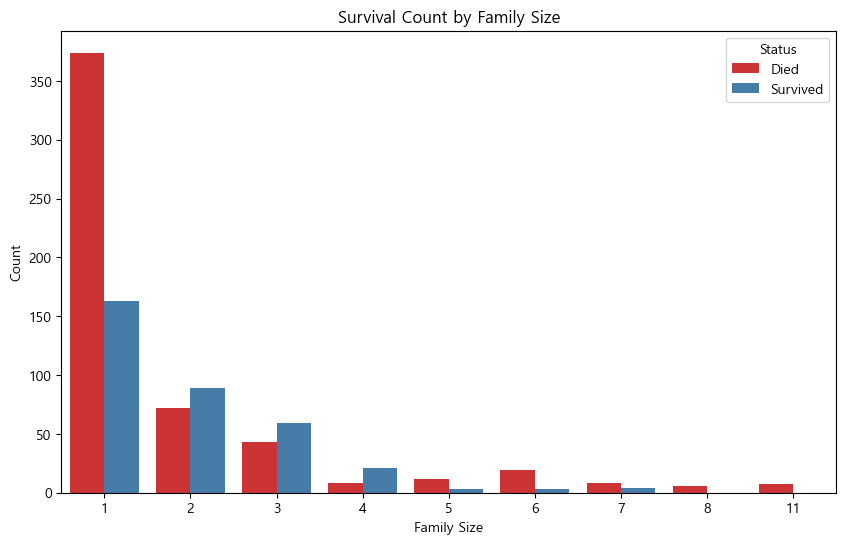

In [411]:
# 피봇 테이블로 가족수별 생존율 확인 및 시각화
# train: 분석할 데이터
# index: 행을 그룹화할 기준이 되는 열 또는 열리스트
# values: 요약할 데이터 열의 이름 > 여기서는 연산을 수행할 열
# 즉 가족수별 생존율
family_survival_rate = pd.pivot_table(train, index='FamilySize', values='Survived')



# FamilySize별 생존과 사망 시각화
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=train, x='FamilySize', hue='Survived', palette='Set1')

# 범례 설정
handles, labels = ax.get_legend_handles_labels() #범례의 커스터마이징을 할 수 있게 함
ax.legend(handles, ['Died', 'Survived'], title='Status')

plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

In [412]:
# FamilySize를 생성했으니  'SibSp', 'Parch  칼럼 제거
drop_list = ['SibSp', 'Parch']
for data in data_list:
    data.drop(drop_list, inplace=True, axis=1)

# Embarked 탑승항구

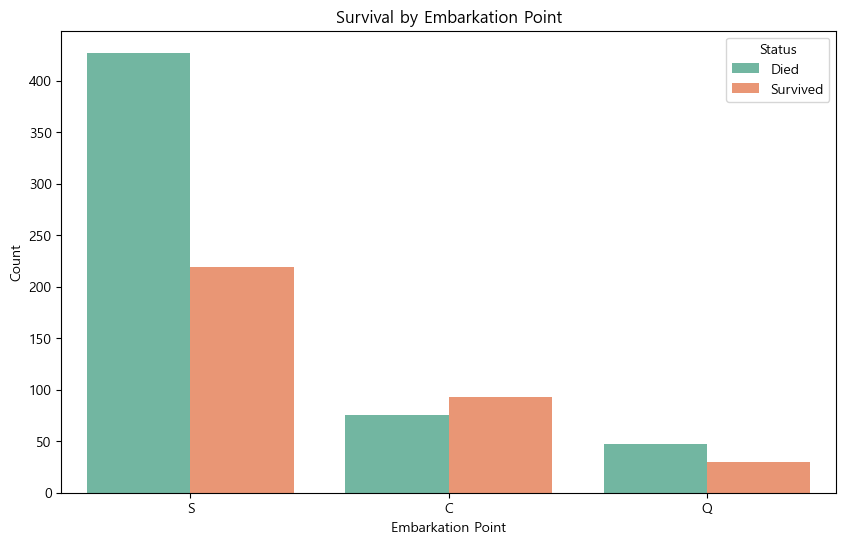

In [413]:
train['Embarked'].isnull().sum() # Embarked의 결측치는 2개뿐 이므로 많은 비율을 차지하는 s로 채움
# train['Embarked'].value_counts() 

# 결측치 처리
for data in data_list:
    # NULL 부분 s로 채움
    data['Embarked'] = data['Embarked'].fillna('S')
    
# 시각화
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train, x='Embarked', hue='Survived', palette='Set2')

# 범례 수정
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Died', 'Survived'], title='Status')  # 범례 레이블 변경

plt.title('Survival by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.show()


In [436]:
# S, C, Q를 각각 0, 1, 2로 매핑
em_mapping = {'S':0, 'C':1, 'Q':2}
for data in data_list:
    data['Embarked'] = data['Embarked'].map(em_mapping)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Cabin: 객실넘버 : 결측치가 687개이므로 안넣는것이 낫다고 판다

In [415]:
# cabin값들의 빈도
# train['Cabin'].value_counts()
# age 결측치 있나 확인
train['Cabin'].isna().sum()

687

In [416]:
# for data in data_list:
#    train['Cabin'] = train['Cabin'].fillna('Nan')
#    data['Cabin'] = data['Cabin'].apply(lambda x:x[0])
# data['Cabin'] = data['Cabin'].astype('category').cat.codes
# train.head()

캐빈은 pass

# Fare: 요금

In [417]:
# 카테고리화 -> 요금 분위를 4개로 나눔?
for data in data_list:
    data['Farerange'] = pd.cut(data['Fare'], 4)
train[['Farerange', 'Survived']].groupby(['Farerange']).mean()

,Survived
Farerange,
"(-0.512, 128.082]",0.368113
"(128.082, 256.165]",0.724138
"(256.165, 384.247]",0.666667
"(384.247, 512.329]",1.000000


In [418]:
for data in data_list:    
    data.loc[data['Fare'] <= 128, 'Fare'] = 0
    data.loc[(data['Fare'] > 128) & (data['Fare'] <= 256), 'Fare'] = 1
    data.loc[(data['Fare'] > 256) & (data['Fare'] <= 384), 'Fare'] = 2
    data.loc[data['Fare'] > 384, 'Fare'] = 3

train.head(80)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_name,FamilySize,Farerange
0,1,0,3,1,1.0,A/5 21171,0.0,NaN,0,2,2,"(-0.512, 128.082]"
1,2,1,1,0,2.0,PC 17599,0.0,C85,1,3,2,"(-0.512, 128.082]"
2,3,1,3,0,1.0,STON/O2. 3101282,0.0,NaN,0,1,1,"(-0.512, 128.082]"
3,4,1,1,0,2.0,113803,0.0,C123,0,3,2,"(-0.512, 128.082]"
4,5,0,3,1,2.0,373450,0.0,NaN,0,2,1,"(-0.512, 128.082]"
...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,3,1,1.0,348123,0.0,F G73,0,2,1,"(-0.512, 128.082]"
76,77,0,3,1,1.0,349208,0.0,NaN,0,2,1,"(-0.512, 128.082]"
77,78,0,3,1,1.0,374746,0.0,NaN,0,2,1,"(-0.512, 128.082]"
78,79,1,2,1,0.0,248738,0.0,NaN,0,0,3,"(-0.512, 128.082]"


In [419]:
# Farerange 컬럼은 필요 없으므로 제거해주었다
for data in data_list:
    data.drop('Farerange', axis=1, inplace=True)

# drop data

In [438]:
train
# cabin컬럼도 제거하는 것이 조금더 성능이 좋아서 뒤늦게 제거에 추가했다 라고는 하지만 난 cabin 자체가 작동안함
drop_list = ['PassengerId', 'Ticket']
for data in data_list:
    data.drop(drop_list, inplace=True, axis=1)
    
for data in data_list:
    data.drop('Cabin', inplace=True, axis=1)

KeyError: "['PassengerId', 'Ticket'] not found in axis"

In [421]:
# 마지막으로 test data에 있는 Fare 결측치 1개를 Fare의 평균으로 채워주었다
test[test['Fare'].isnull()] = test['Fare'].mean()

train.head()
# test.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
0,0,3,1,1.0,0.0,0,2,2
1,1,1,0,2.0,0.0,1,3,2
2,1,3,0,1.0,0.0,0,1,1
3,1,1,0,2.0,0.0,0,3,2
4,0,3,1,2.0,0.0,0,2,1


In [437]:
correlation_matrix2= train.corr()
correlation_matrix2

# # 상관계수 계산

print(correlation_matrix2)

# 상관계수 히트맵 생성
plt.figure(figsize=(10, 8))  # 히트맵 크기 설정
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('상관 행렬')  # 히트맵 제목 설정
plt.show()




ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [439]:
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# FE전 상관 계수
위사진

# FE 후 상관계수
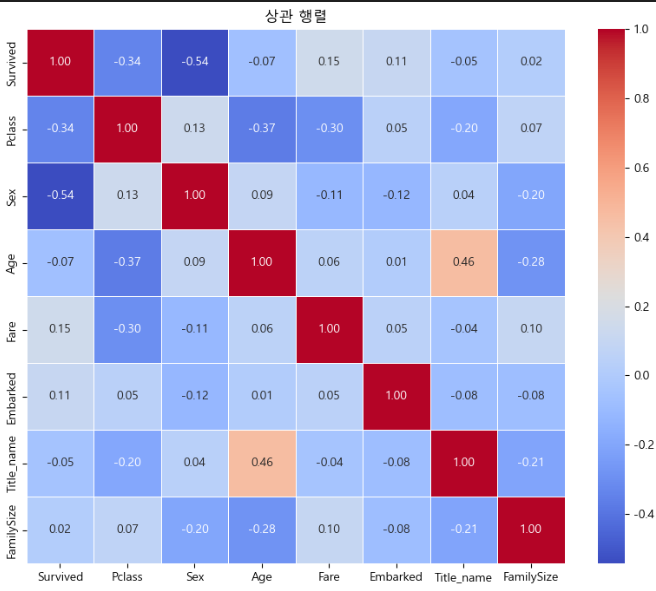

# 모델링

In [423]:
# 독립변수
train_input = train.drop('Survived', axis=1).values # train_input: 생존열 제외한 모든 열의 값들

# 종속변수 -> 모델이 예측해야할 타깃
train_target = train['Survived'].values #train_target: 생존 열에 값들

# print(train_input.shape, train_target.shape)  #(891, 7) (891,)
# print(train_input)
# print(train_target)
# 라이브러리
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# train 데이터프레임에서 'Age' 열이 NULL인 행만 선택



## KNN


In [424]:
model = KNeighborsClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))

0.8369821296310886 0.8013495700207143
